<a href="https://colab.research.google.com/github/Sejalb18/fintech-transaction-prediction/blob/main/Fintech2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original rows: 7000
Original rows: 7000
Original rows: 7000
Original rows: 7000
Original rows: 7000
Original rows: 7000
Original rows: 7000
Original rows: 7000
Original rows: 7000
Original rows: 7000
Original rows: 7000
Original rows: 7000
Original rows: 7000
Original rows: 7000
Original rows: 7000
Rows after outlier removal: 6818
<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>


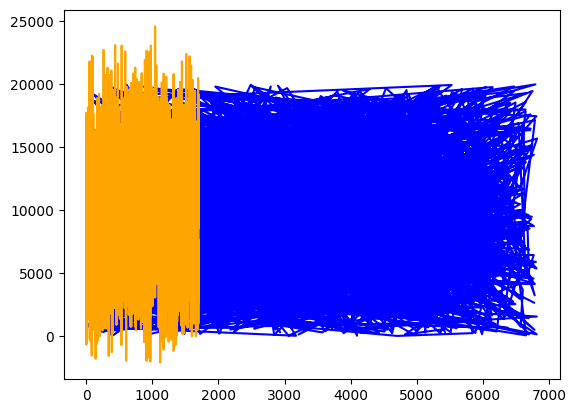

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv("Fintech2.csv")
df = df.drop(columns=['Customer_ID']) #no use in regression

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Make a copy of the original DataFrame (optional but safer)
clean_df = df.copy()

# Loop over each numeric column and remove outliers using IQR
for col in numeric_cols:
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows within bounds
    clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]

    print(f"Original rows: {len(df)}")
print(f"Rows after outlier removal: {len(clean_df)}")

#to access the dataset without outliers
clean_df.to_csv("clean_dataset.csv", index=False)

#to read and load the  dataset without outliers
df=pd.read_csv("clean_dataset.csv")
df.head()

#splilting the data
x = df.drop(columns=['Avg_Transaction_Value'])  # everything except target() # independent
y = df['Avg_Transaction_Value']     #Avg_Transaction_Value # dependent

# to display x
x

# to display y
y

#  List of categorical columns to encode
categorical_features = ['Location', 'Income_Level', 'App_Usage_Frequency', 'Preferred_Payment_Method']

# Apply OneHotEncoding to categorical columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),categorical_features)], remainder='passthrough')
x = ct.fit_transform(x)

#  traning & test spilt
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#model buliding
from sklearn. linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

#prediciting the test result
y_pred = model.predict(x_test)

plt.plot(y_test, color='blue', label='test')
plt.plot(y_pred, color='orange', label='predictions')
print(plt)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model performance evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

# Display model coefficients and intercept
print("\nModel Coefficients:")
print(model.coef_)
print("\nModel Intercept:")
print(model.intercept_)



Mean Absolute Error (MAE): 1609.140944090673
Mean Squared Error (MSE): 4418730.421076917
Root Mean Squared Error (RMSE): 2102.0776439220595
R-squared (R2) Score: 0.8635297206372263

Model Coefficients:
[ 8.01685204e+01  1.20025777e+02 -2.49252410e+00  1.64351978e+03
  1.64972842e+03  1.67876501e+03 -1.40617459e+02 -7.73252321e+01
 -7.24664392e+01  1.15327951e+03  1.16936474e+03  1.18206672e+03
  1.12147592e+03  2.00702110e+01 -2.23673394e+03  1.61354066e+03
  1.69417977e+03 -1.36435098e+11 -2.57615325e+01  3.11067094e+01
 -9.69316156e+08 -4.92039460e+08  2.43905415e+08  2.28622538e+01
 -9.95348816e+00 -9.63103944e+08  1.36449643e+11]

Model Intercept:
9711.115643408493


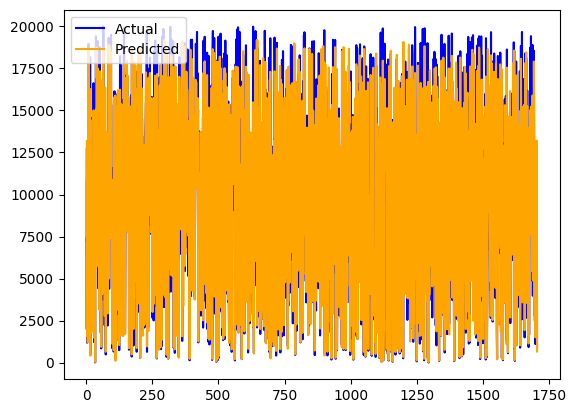

In [ ]:
# random forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
#splilting the data
x = df.drop(columns=['Avg_Transaction_Value'])  # everything except target() # independent
y = df['Avg_Transaction_Value']     #Avg_Transaction_Value # dependent

# to display x
x

# to display y
y

#  List of categorical columns to encode
categorical_features = ['Location', 'Income_Level', 'App_Usage_Frequency', 'Preferred_Payment_Method']

# Apply OneHotEncoding to categorical columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),categorical_features)], remainder='passthrough')
x = ct.fit_transform(x)

#  traning & test spilt
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model building
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(x_train, y_train)

# Predicting the test result
y_pred = model.predict(x_test)

# Plotting actual vs predicted
sns.lineplot
plt.plot(y_test.values, color='blue', label='Actual')
plt.plot(y_pred, color='orange', label='Predicted')
plt.legend()
plt.show()

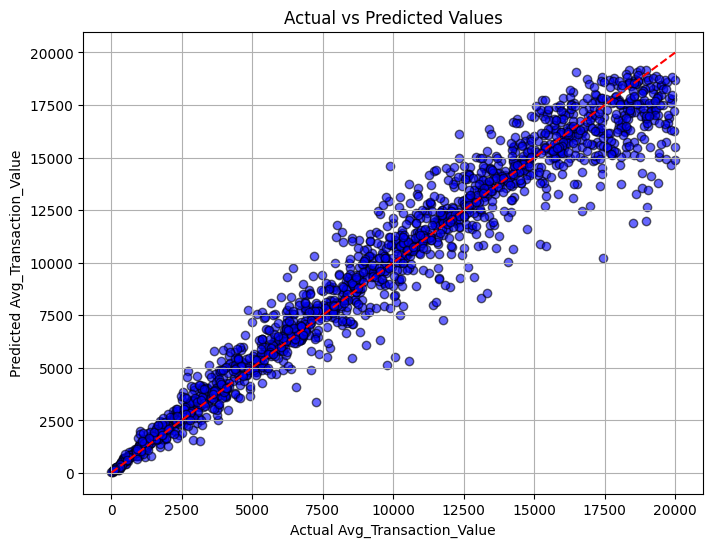

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Avg_Transaction_Value')
plt.ylabel('Predicted Avg_Transaction_Value')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


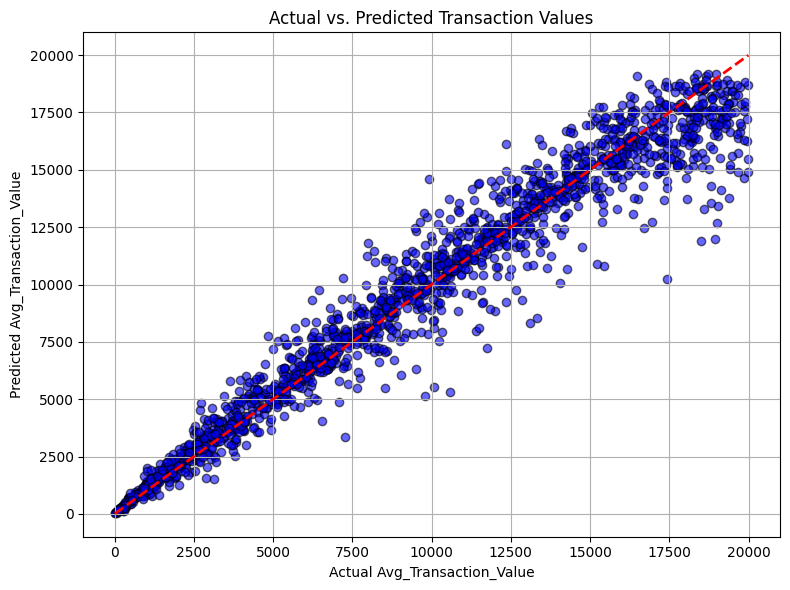

In [ ]:
import matplotlib.pyplot as plt

# Actual vs. Predicted Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal prediction line
plt.xlabel('Actual Avg_Transaction_Value')
plt.ylabel('Predicted Avg_Transaction_Value')
plt.title('Actual vs. Predicted Transaction Values')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Model performance evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("----- Model Summary -----")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")


----- Model Summary -----
Mean Absolute Error (MAE): 855.2201993680022
Mean Squared Error (MSE): 1648869.2330789082
Root Mean Squared Error (RMSE): 1284.0830320033467
R-squared (R2 Score): 0.9493683362444466


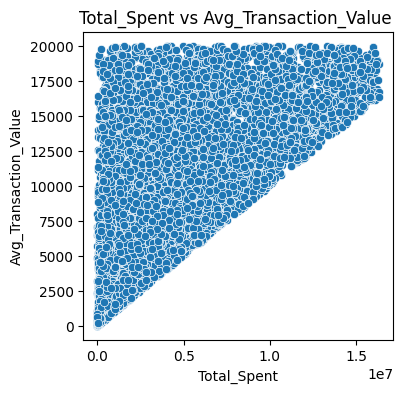

In [ ]:
#scatter plot
plt.figure(figsize=(4,4))
sns.scatterplot(x="Total_Spent",y="Avg_Transaction_Value",  data=df)
plt.title('Total_Spent vs Avg_Transaction_Value ')
plt.xlabel('Total_Spent')
plt.ylabel('Avg_Transaction_Value')
plt.show()



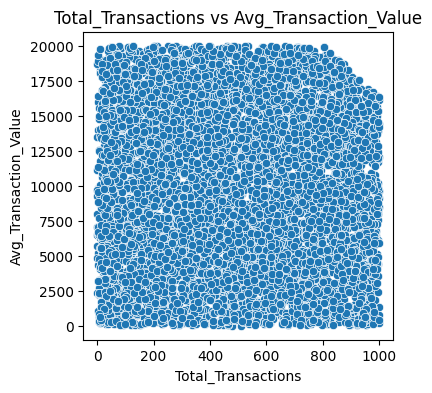

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='Total_Transactions',y='Avg_Transaction_Value',data=df)
plt.title('Total_Transactions vs Avg_Transaction_Value')
plt.xlabel('Total_Transactions')
plt.ylabel('Avg_Transaction_Value')
plt.show()
plt.ylabel=('Avg_Transaction_Value')
plt.show()


TypeError: 'str' object is not callable

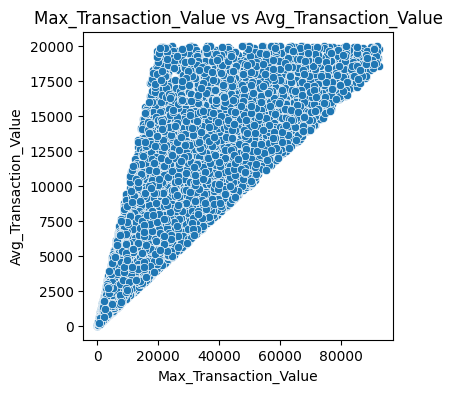

In [ ]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='Max_Transaction_Value',y='Avg_Transaction_Value', data=df)
plt.title('Max_Transaction_Value vs Avg_Transaction_Value')
plt.xlabel('Max_Transaction_Value')
plt.ylabel('Avg_Transaction_Value')
plt.show()

In [ ]:
#correlation


In [ ]:
#boxplot
plt.figure(figsize=(4,4))
sns.boxplot(x='Income_Level',y='Avg_Transaction_Value',data=df)
plt.title('Income Level and Avg Transaction Value')
plt.xlabel('Income_Level')
plt.ylabel('Avg_Transaction_Value')
plt.show()



TypeError: 'str' object is not callable

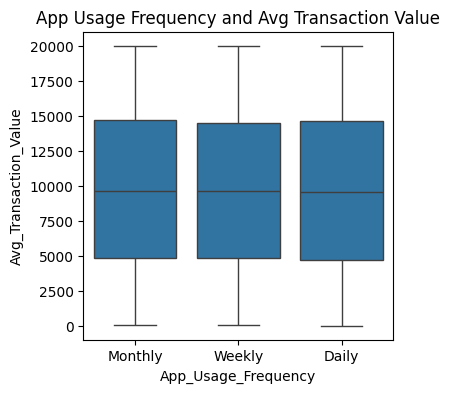

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(x='App_Usage_Frequency',y='Avg_Transaction_Value',data=df)
plt.title('App Usage Frequency and Avg Transaction Value')
plt.xlabel('App_Usage_Frequency')
plt.ylabel('Avg_Transaction_Value')
plt.show()

TypeError: 'str' object is not callable

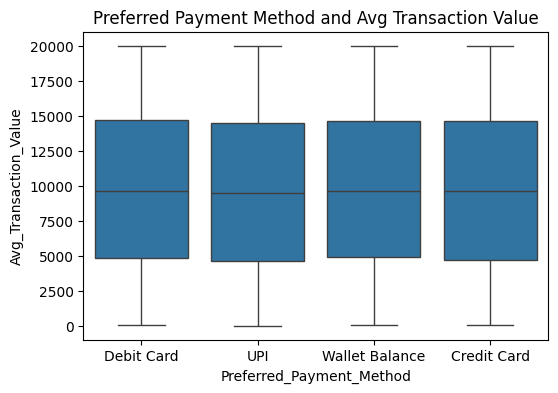

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Preferred_Payment_Method',y='Avg_Transaction_Value',data=df)
plt.title('Preferred Payment Method and Avg Transaction Value')
plt.xlabel('Preferred_Payment_Method')
plt.ylabel('Avg_Transaction_Value')
plt.show()

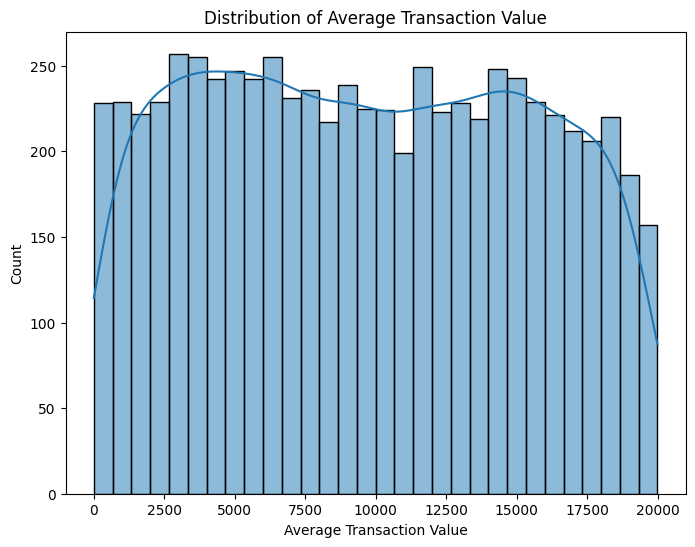

In [ ]:
#Histogram
plt.figure(figsize=(8,6))
sns.histplot(df['Avg_Transaction_Value'], bins=30, kde=True)
plt.title('Distribution of Average Transaction Value')
plt.xlabel('Average Transaction Value')
plt.show()

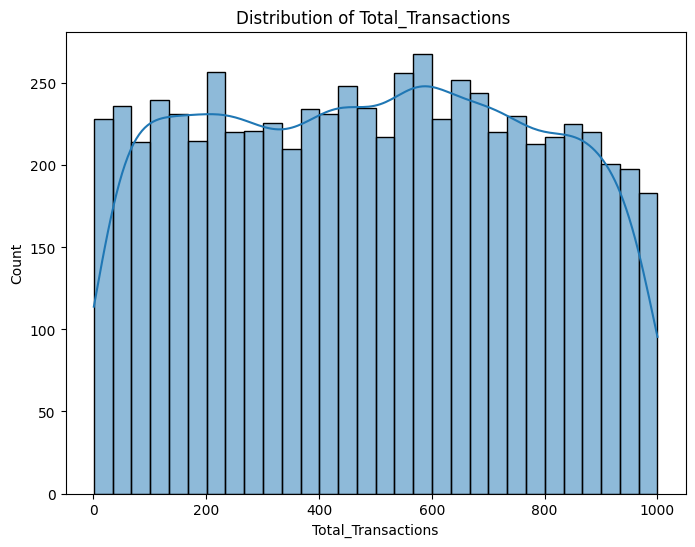

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['Total_Transactions'], bins=30, kde=True)
plt.title('Distribution of Total_Transactions ')
plt.xlabel('Total_Transactions')
plt.show()

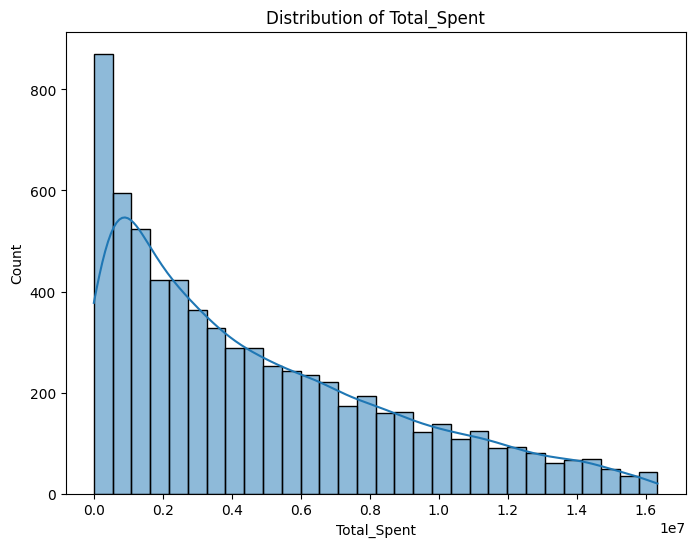

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['Total_Spent'], bins=30, kde=True)
plt.title('Distribution of Total_Spent')
plt.xlabel('Total_Spent')
plt.show()

In [ ]:
#correlation
correlation = df['Avg_Transaction_Value'].corr(df['Total_Spent'])
print(correlation)
correlation = df['Avg_Transaction_Value'].corr(df['Max_Transaction_Value'])
print(correlation)
correlation = df['Avg_Transaction_Value'].corr(df['Min_Transaction_Value'])
print(correlation)


0.6463273742691422
0.7980511689962383
0.7945271519746355


In [ ]:
print("\nDescriptive Statistics:")
print(df.describe())